In [71]:
from requests import get
from bs4 import BeautifulSoup
from IPython.core.display import clear_output
from time import sleep, time
from random import randint
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud  #pip install wordcloud  <--- Do this in anaconda before you run jupyter notebook
import numpy as np
from statistics import mean
veg_average_ratings = {}
veg_number_of_reviews = {}
veg_price_per_person = {}

non_veg_average_ratings = {}
non_veg_number_of_reviews = {}
non_veg_price_per_person = {}

user_text = []

In [72]:
import pandas as pd

In [ ]:
# extra veg_links    
    "Maruya": "https://www.yelp.com/biz/maruya-san-francisco?osq=Restaurants",
    "The Dosa Brothers": "https://www.yelp.com/biz/the-dosa-brothers-san-francisco-10?osq=Restaurants",
    "Cha-Ya": "https://www.yelp.com/biz/cha-ya-san-francisco-5?osq=restaurants",
    "Udupi Palace": "https://www.yelp.com/biz/udupi-palace-san-francisco?osq=restaurants",
    "Peasant Pies Noe Valley": "https://www.yelp.com/biz/peasant-pies-noe-valley-san-francisco?osq=Restaurants",
    "Besharam": "https://www.yelp.com/biz/besharam-san-francisco?osq=restaurants",
    "Lucky Creation Vegeterian Restaurant": "https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=Restaurants",
    "Beloved Cafe": "https://www.yelp.com/biz/beloved-cafe-san-francisco?osq=restaurants",
    "Morty's Delicatessen": "https://www.yelp.com/biz/mortys-delicatessen-san-francisco?osq=Restaurants",
    "Donut Farm": "https://www.yelp.com/biz/donut-farm-san-francisco?osq=Restaurants",
    "Curry Up Now": "https://www.yelp.com/biz/curry-up-now-san-francisco-5?osq=restaurants"
# extra non_veg_links
    "Basa Seafood Express": "https://www.yelp.com/biz/basa-seafood-express-san-francisco?osq=restaurants",
    "Loló": "https://www.yelp.com/biz/lol%C3%B3-san-francisco-4?osq=restaurants",
    "Son’s Addition": "https://www.yelp.com/biz/sons-addition-san-francisco-7?osq=vegetarian",
    "Californios": "https://www.yelp.com/biz/californios-san-francisco?osq=restaurants",
    "El Metate Restaurant": "https://www.yelp.com/biz/el-metate-restaurant-san-francisco?osq=restaurants",
    "Myriad Gastropub": "https://www.yelp.com/biz/myriad-gastropub-san-francisco?osq=restaurants",
    "Rinataro": "https://www.yelp.com/biz/rintaro-san-francisco-4?osq=vegetarian",
    "OzaOza": "https://www.yelp.com/biz/ozaoza-san-francisco?osq=restaurants"

In [79]:
veg_restaurants_links = {
    "MIXT": "https://www.yelp.com/biz/mixt-san-francisco-13?osq=restaurants",
    "Something Simple for Lunch": "https://www.yelp.com/biz/something-simple-for-lunch-san-francisco?osq=Restaurants",
    "Indochine Vegan": "https://www.yelp.com/biz/indochine-vegan-san-francisco-2?osq=restaurants",
    "Lucky Creation": "https://www.yelp.com/biz/lucky-creation-vegetarian-restaurant-san-francisco?osq=vegetarian",
    "Shizen Vegan Sushi Bar & Izakaya": "https://www.yelp.com/biz/shizen-vegan-sushi-bar-and-izakaya-san-francisco?osq=restaurants",
    "Greens Restaurant": "https://www.yelp.com/biz/greens-restaurant-san-francisco-5?osq=restaurants",
    "Nightbird": "https://www.yelp.com/biz/nightbird-san-francisco?osq=Restaurants",
    "Gracias Madre": "https://www.yelp.com/biz/gracias-madre-san-francisco?osq=restaurants",
    
}
non_veg_restaurants_links = {
    "La Taqueria": "https://www.yelp.com/biz/la-taqueria-san-francisco-2?osq=restaurants",
    "Limón Rotisserie": "https://www.yelp.com/biz/lim%C3%B3n-rotisserie-san-francisco-3?osq=restaurants",
    "Foreign Cinema": "https://www.yelp.com/biz/foreign-cinema-san-francisco?osq=vegetarian",
    "Sushi Hon": "https://www.yelp.com/biz/sushi-hon-san-francisco?osq=restaurants",
    "El Farolito":"https://www.yelp.com/biz/el-farolito-san-francisco-2?osq=restaurants",
    "Al’s Place": "https://www.yelp.com/biz/als-place-san-francisco?osq=vegetarian",
    "Lazy Bear": "https://www.yelp.com/biz/lazy-bear-san-francisco-5?osq=restaurants",
    
    
}


In [80]:
## find average rating of each restaurant
def scrape_average_ratings(html_soup, rating_container):
    ## some links have different div className
    if rating_container is None:
        rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4-half__373c0__2rd5j border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        if rating_container is None:
            rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-3-half__373c0__3i1MU border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
            if rating_container is None:
                rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-5__373c0__33XOk border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                return rating_container['aria-label']
            else:
                return rating_container['aria-label']
        else:
            return rating_container['aria-label']
    else:
        return rating_container['aria-label']

        
## find number of ratings of each restaurant
def scrape_number_of_reviews(review_container):
    return review_container.p.text

## find price per person of each restaurant
def scrape_price_per_person(html_soup):
    price_container = html_soup.find('span', class_ = "lemon--span__373c0__3997G text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_ text-bullet--after__373c0__1ZHaA text-size--large__373c0__1568g")
    return price_container.text

## find user ratings of each restaurant, i = restaurant, returns list of user ratings
def scrape_user_ratings(html_soup, i):
    user_review_containers = html_soup.find_all('li', class_ = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT")
    
    print(i)
    user_ratings = []
    
    for container in user_review_containers:
        user_rating_text_container = container.find('p', class_ ="lemon--p__373c0__3Qnnj text__373c0__2pB8f comment__373c0__3EKjH text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_")
        user_text.append(user_rating_text_container.text)
        user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-4__373c0__3acau border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        if user_rating_container is None:
            user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-5__373c0__ySHIl border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
            if user_rating_container is None:
                user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-3__373c0__1DXMK border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                if user_rating_container is None:
                    user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-1__373c0__14nrQ border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                    if user_rating_container is None:
                        user_rating_container = container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--regular-2__373c0__rHJw2 border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
                        if user_rating_container is None:
                            print(None)
                        else:
                            user_ratings.append(user_rating_container['aria-label'])
                    else:
                        user_ratings.append(user_rating_container['aria-label'])
                else:
                    user_ratings.append(user_rating_container['aria-label'])
            else:
                user_ratings.append(user_rating_container['aria-label'])
        else:
            user_ratings.append(user_rating_container['aria-label'])
    
    return user_ratings

In [81]:
# non_veg_text = []
# def scrape_user_text(html_soup,i):
#     user_review_containers = html_soup.find_all('li', class_ = "lemon--li__373c0__1r9wz u-space-b3 u-padding-b3 border--bottom__373c0__uPbXS border-color--default__373c0__2oFDT")
#     for containers in user_review_containers:
#         user_rating_text_container = container.find('span', class_ ="lemon--span__373c0__3997G")
#         print(user_rating_text_container)
#         #non_veg_review_text.append(user_user_rating_text_container.text)
# scrape_user_text(html_soup, i)

In [82]:
veg_user_ratings = {}
def scrape_veg_restaurants(requests, start_time):
    for i in veg_restaurants_links:
        response = get(veg_restaurants_links[i])
        sleep(randint(8,15))

        requests += 1
        elapsed_time = time() - start_time
        print("Request {}, Frequency {} requests/s".format(requests, requests/elapsed_time))
        clear_output(wait=True)

        html_soup = BeautifulSoup(response.text, 'html.parser')
        ## this container contains both review and rating containers
        review_and_rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc arrange__373c0__UHqhV gutter-6__373c0__zqA5A vertical-align-middle__373c0__2TQsQ u-space-b1 border-color--default__373c0__2oFDT")

        ## find asverage rating and numbre of reviews of each restaurant
        rating_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4__373c0__3fk-p border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        review_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc arrange-unit__373c0__1piwO border-color--default__373c0__2oFDT nowrap__373c0__1_N1j")
        
        veg_average_ratings[i] = scrape_average_ratings(html_soup, rating_container)
        veg_number_of_reviews[i] = scrape_number_of_reviews(review_container)
        veg_price_per_person[i] = scrape_price_per_person(html_soup)
        
        veg_user_ratings[i] = scrape_user_ratings(html_soup, i)
        print(veg_user_ratings[i])
        

In [83]:
non_veg_user_ratings = {}
def scrape_non_veg_restaurants(requests, start_time):
    for i in non_veg_restaurants_links:
        response = get(non_veg_restaurants_links[i])
        sleep(randint(8,15))

        requests += 1
        elapsed_time = time() - start_time
        print("Request {}, Frequency {} requests/s".format(requests, requests/elapsed_time))
        clear_output(wait=True)

        html_soup = BeautifulSoup(response.text, 'html.parser')
        ## this container contains both review and rating containers
        review_and_rating_container = html_soup.find('div', class_ = "lemon--div__373c0__1mboc arrange__373c0__UHqhV gutter-6__373c0__zqA5A vertical-align-middle__373c0__2TQsQ u-space-b1 border-color--default__373c0__2oFDT")

        ## find asverage rating and numbre of reviews of each restaurant
        rating_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc i-stars__373c0__Y2F3O i-stars--large-4__373c0__3fk-p border-color--default__373c0__2oFDT overflow--hidden__373c0__8Jq2I")
        review_container = review_and_rating_container.find('div', class_ = "lemon--div__373c0__1mboc arrange-unit__373c0__1piwO border-color--default__373c0__2oFDT nowrap__373c0__1_N1j")
        
        non_veg_average_ratings[i] = scrape_average_ratings(html_soup, rating_container)
        non_veg_number_of_reviews[i] = scrape_number_of_reviews(review_container)
        non_veg_price_per_person[i] = scrape_price_per_person(html_soup)
        
        non_veg_user_ratings[i] = scrape_user_ratings(html_soup, i)
        print(non_veg_user_ratings[i])


In [84]:
scrape_veg_restaurants(0, time())
scrape_non_veg_restaurants(0, time())

Lazy Bear
['5 star rating', '4 star rating', '5 star rating', '5 star rating', '5 star rating', '4 star rating', '5 star rating', '5 star rating', '4 star rating', '5 star rating', '5 star rating', '5 star rating', '4 star rating', '3 star rating', '3 star rating', '5 star rating', '5 star rating', '5 star rating', '4 star rating', '5 star rating']


In [85]:
for i in range(len(user_text)):
    user_text[i] = user_text[i].replace("\xa0", '') #Clean up the texts


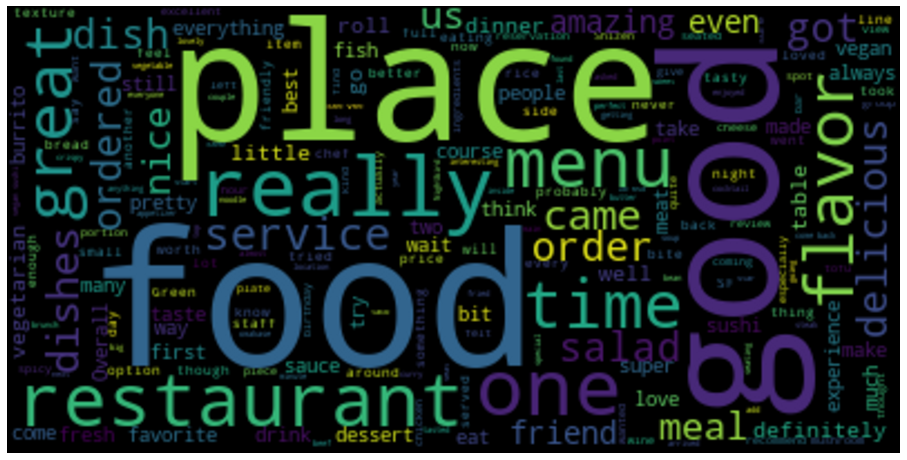

In [86]:
user_text = str(user_text)

wordcloud = WordCloud().generate(user_text)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud, interpolation="mitchell")
plt.axis("off") #Don't show axis since not needed
plt.show()

In [87]:
def clean_data(average_ratings, number_of_reviews, price_per_person):
    for rating in average_ratings:
        average_ratings[rating] = float(average_ratings[rating].replace(" star rating", ""))
    
    for i in number_of_reviews:
        number_of_reviews[i] = int(number_of_reviews[i].replace(" reviews", ""))
    
    for i in price_per_person:
        price_per_person[i] = len(price_per_person[i])-1
        
        
clean_data(veg_average_ratings, veg_number_of_reviews, veg_price_per_person)
clean_data(non_veg_average_ratings, non_veg_number_of_reviews, non_veg_price_per_person)

In [94]:
non_veg_user_ratings

{'La Taqueria': [5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 3, 4, 4, 4, 3, 5, 5],
 'Limón Rotisserie': [5,
  5,
  4,
  3,
  4,
  5,
  4,
  5,
  4,
  4,
  5,
  5,
  3,
  5,
  5,
  4,
  5,
  4,
  4,
  4],
 'Foreign Cinema': [5,
  4,
  3,
  4,
  4,
  4,
  3,
  5,
  4,
  5,
  4,
  3,
  4,
  4,
  3,
  5,
  3,
  5,
  4,
  5],
 'Sushi Hon': [5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 2, 4, 5, 3, 5, 4, 1, 5, 5],
 'El Farolito': [5, 4, 5, 5, 5, 4, 4, 5, 4, 2, 5, 4, 3, 4, 4, 5, 4, 4, 3, 3],
 'Al’s Place': [4, 5, 4, 4, 5, 3, 5, 5, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 5, 5],
 'Lazy Bear': [5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 3, 3, 5, 5, 5, 4, 5]}

In [103]:
veg_user_ratings

{'Indochine Vegan': [5,
  4,
  5,
  5,
  5,
  4,
  4,
  3,
  4,
  4,
  1,
  4,
  3,
  3,
  3,
  4,
  5,
  5,
  4,
  1],
 'Lucky Creation': [5,
  5,
  5,
  3,
  4,
  4,
  5,
  5,
  4,
  4,
  3,
  5,
  1,
  5,
  4,
  5,
  3,
  5,
  4,
  5],
 'Shizen Vegan Sushi Bar & Izakaya': [5,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  5,
  5,
  5,
  5,
  5],
 'Greens Restaurant': [5,
  3,
  2,
  5,
  4,
  4,
  1,
  5,
  5,
  5,
  3,
  5,
  4,
  3,
  5,
  5,
  5,
  5,
  5,
  5],
 'Nightbird': [4, 5, 5, 3, 5, 5, 5, 1, 2, 1, 5, 5, 2, 5, 4, 5, 4, 5, 3, 5],
 'Gracias Madre': [5, 3, 5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 5, 3, 5, 5, 4, 4, 2, 3]}

In [100]:
#non_veg_user_ratings.replace(' star rating', "")

[5, 5, 5]

In [92]:
non_veg_user_ratings_list = list(non_veg_user_ratings.values())
for i in range(len(non_veg_user_ratings_list)):
    for j in range(20):
        non_veg_user_ratings_list[i][j] = int(non_veg_user_ratings_list[i][j].replace(" star rating", ""))

AttributeError: 'int' object has no attribute 'replace'

In [102]:
veg_user_ratings_list = list(veg_user_ratings.values())
for i in range(len(veg_user_ratings_list)):
    for j in range(len(veg_user_ratings_list[i])):
        veg_user_ratings_list[i][j] = int(veg_user_ratings_list[i][j].replace(" star rating", ""))

In [16]:
non_veg_user_ratings_list

[[5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 3, 4, 4, 4, 3, 5, 5],
 [5, 5, 4, 3, 4, 5, 4, 5, 4, 4, 5, 5, 3, 5, 5, 4, 5, 4, 4, 4],
 [5, 4, 3, 4, 4, 4, 3, 5, 4, 5, 4, 4, 3, 3, 5, 4, 5, 3, 4, 5],
 [5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 2, 4, 5, 3, 5, 4, 1, 5, 5],
 [5, 4, 5, 5, 5, 4, 4, 4, 2, 5, 4, 3, 4, 4, 5, 4, 4, 3, 4, 3],
 [4, 5, 4, 4, 5, 3, 5, 5, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 5, 5],
 [5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 3, 3, 5, 5, 5, 4, 5],
 [5, 4, 2, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 5, 5, 5, 3],
 [5, 5, 5, 5, 4, 5, 3, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 3, 5],
 [5, 3, 5, 4, 5, 4, 5, 4, 3, 4, 4, 4, 4, 5, 4, 5, 4, 2, 5, 5],
 [5, 5, 4, 4, 4, 5, 5, 5, 3, 3, 5, 4, 3, 5, 4, 5, 5, 5, 5, 5],
 [5, 3, 3, 5, 3, 5, 4, 1, 2, 3, 2, 4, 4, 1, 5, 5, 3, 5, 5, 5],
 [5, 4, 4, 5, 5, 4, 4, 3, 3, 2, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4],
 [5, 5, 3, 4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 4],
 [5, 4, 5, 5, 1, 1, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5]]

In [104]:
veg_user_ratings_list

[[5, 4, 5, 5, 5, 4, 4, 3, 4, 4, 1, 4, 3, 3, 3, 4, 5, 5, 4, 1],
 [5, 5, 5, 3, 4, 4, 5, 5, 4, 4, 3, 5, 1, 5, 4, 5, 3, 5, 4, 5],
 [5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5],
 [5, 3, 2, 5, 4, 4, 1, 5, 5, 5, 3, 5, 4, 3, 5, 5, 5, 5, 5, 5],
 [4, 5, 5, 3, 5, 5, 5, 1, 2, 1, 5, 5, 2, 5, 4, 5, 4, 5, 3, 5],
 [5, 3, 5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 5, 3, 5, 5, 4, 4, 2, 3]]

In [187]:
non_veg_average = []
for i in range(len(non_veg_user_ratings_list)):
    non_veg_average.append(np.nanmean(non_veg_user_ratings_list[i]))
    
non_veg_average

[4.4, 4.35, 4.05, 4.2, 4.1, 4.15, 4.55]

In [107]:
veg_average = []
for i in range(len(veg_user_ratings_list)):
    veg_average.append(np.nanmean(veg_user_ratings_list[i]))
    
veg_average

[3.8, 4.2, 4.7, 4.2, 3.95, 3.9]

In [115]:
len(non_veg_user_ratings)
len(non_veg_average)

0

In [117]:
for i in range(len(non_veg_user_ratings)):
    non_veg_user_ratings_list[i].append(non_veg_average[i])

non_veg_user_ratings_list


[[5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 3, 4, 4, 4, 3, 5, 5, 4.4],
 [5, 5, 4, 3, 4, 5, 4, 5, 4, 4, 5, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4.35],
 [5, 4, 3, 4, 4, 4, 3, 5, 4, 5, 4, 3, 4, 4, 3, 5, 3, 5, 4, 5, 4.05],
 [5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 2, 4, 5, 3, 5, 4, 1, 5, 5, 4.2],
 [5, 4, 5, 5, 5, 4, 4, 5, 4, 2, 5, 4, 3, 4, 4, 5, 4, 4, 3, 3, 4.1],
 [4, 5, 4, 4, 5, 3, 5, 5, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 5, 5, 4.15],
 [5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 3, 3, 5, 5, 5, 4, 5, 4.55]]

In [118]:
for i in range(len(veg_user_ratings)-1):
    veg_user_ratings_list[i].append(veg_average[i])

veg_user_ratings_list

[[5, 4, 5, 5, 5, 4, 4, 3, 4, 4, 1, 4, 3, 3, 3, 4, 5, 5, 4, 1, 3.8],
 [5, 5, 5, 3, 4, 4, 5, 5, 4, 4, 3, 5, 1, 5, 4, 5, 3, 5, 4, 5, 4.2],
 [5, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4.7],
 [5, 3, 2, 5, 4, 4, 1, 5, 5, 5, 3, 5, 4, 3, 5, 5, 5, 5, 5, 5, 4.2],
 [4, 5, 5, 3, 5, 5, 5, 1, 2, 1, 5, 5, 2, 5, 4, 5, 4, 5, 3, 5, 3.95],
 [5, 3, 5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 5, 3, 5, 5, 4, 4, 2, 3]]

In [119]:
reviews_df = pd.DataFrame(non_veg_user_ratings) #Dataframe with review ratings
reviews_df.index = ["Review_1", "Review_2","Review_3","Review_4","Review_5","Review_6","Review_7","Review_8","Review_9","Review_10","Review_11","Review_12","Review_13","Review_14","Review_15","Review_16","Review_17","Review_18","Review_19","Review_20","Review_Average"]
reviews_df

,La Taqueria,Limón Rotisserie,Foreign Cinema,Sushi Hon,El Farolito,Al’s Place,Lazy Bear
Review_1,5.0,5.00,5.00,5.0,5.0,4.00,5.00
Review_2,4.0,5.00,4.00,4.0,4.0,5.00,4.00
Review_3,5.0,4.00,3.00,4.0,5.0,4.00,5.00
Review_4,5.0,3.00,4.00,4.0,5.0,4.00,5.00
Review_5,4.0,4.00,4.00,5.0,5.0,5.00,5.00
Review_6,5.0,5.00,4.00,5.0,4.0,3.00,4.00
Review_7,5.0,4.00,3.00,5.0,4.0,5.00,5.00
Review_8,5.0,5.00,5.00,5.0,5.0,5.00,5.00
Review_9,4.0,4.00,4.00,5.0,4.0,5.00,4.00
Review_10,5.0,4.00,5.00,5.0,2.0,3.00,5.00


In [150]:
veg_user_ratings

{'Indochine Vegan': [5,
  4,
  5,
  5,
  5,
  4,
  4,
  3,
  4,
  4,
  1,
  4,
  3,
  3,
  3,
  4,
  5,
  5,
  4,
  1,
  3.8],
 'Lucky Creation': [5,
  5,
  5,
  3,
  4,
  4,
  5,
  5,
  4,
  4,
  3,
  5,
  1,
  5,
  4,
  5,
  3,
  5,
  4,
  5,
  4.2],
 'Shizen Vegan Sushi Bar & Izakaya': [5,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  4.7],
 'Greens Restaurant': [5,
  3,
  2,
  5,
  4,
  4,
  1,
  5,
  5,
  5,
  3,
  5,
  4,
  3,
  5,
  5,
  5,
  5,
  5,
  5,
  4.2],
 'Nightbird': [4,
  5,
  5,
  3,
  5,
  5,
  5,
  1,
  2,
  1,
  5,
  5,
  2,
  5,
  4,
  5,
  4,
  5,
  3,
  5,
  3.95],
 'Gracias Madre': [5, 3, 5, 4, 3, 5, 5, 2, 4, 3, 4, 4, 5, 3, 5, 5, 4, 4, 2, 3]}

In [166]:
veg_reviews_df = pd.DataFrame(veg_user_ratings) #Dataframe with review ratings
veg_reviews_df.index = ["Review_1", "Review_2","Review_3","Review_4","Review_5","Review_6","Review_7","Review_8","Review_9","Review_10","Review_11","Review_12","Review_13","Review_14","Review_15","Review_16","Review_17","Review_18","Review_19","Review_20","Review_Average"]
veg_reviews_df

,Indochine Vegan,Lucky Creation,Shizen Vegan Sushi Bar & Izakaya,Greens Restaurant,Nightbird,Gracias Madre
Review_1,5.0,5.0,5.0,5.0,4.00,5.0
Review_2,4.0,5.0,3.0,3.0,5.00,3.0
Review_3,5.0,5.0,4.0,2.0,5.00,5.0
Review_4,5.0,3.0,5.0,5.0,3.00,4.0
Review_5,5.0,4.0,5.0,4.0,5.00,3.0
Review_6,4.0,4.0,5.0,4.0,5.00,5.0
Review_7,4.0,5.0,5.0,1.0,5.00,5.0
Review_8,3.0,5.0,4.0,5.0,1.00,2.0
Review_9,4.0,4.0,5.0,5.0,2.00,4.0
Review_10,4.0,4.0,5.0,5.0,1.00,3.0


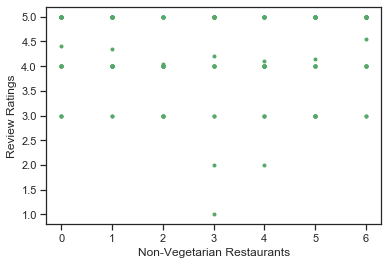

In [121]:
fig = plt.figure()
x1 = fig.add_subplot(1, 1, 1)
x1.set_xlabel('Non-Vegetarian Restaurants')
x1.set_ylabel('Review Ratings')
x1.plot(non_veg_user_ratings_list,'g.')

In [132]:
a='MIXT'
b='Something Simple for Lunch'

In [133]:
veg_average_ratings.pop(a)
veg_average_ratings.pop(b)

veg_number_of_reviews.pop(a)
veg_number_of_reviews.pop(b)

veg_price_per_person.pop(a)
veg_price_per_person.pop(b)

1

In [134]:
import pandas as pd

def get_df(average_ratings, number_of_reviews, price_per_person,average):
    data = {
        "Restaurants": list(average_ratings.keys()),
        "Average Ratings": list(average_ratings.values()),
        "Number Of Reviews": list(number_of_reviews.values()),
        "Price Per Person": list(price_per_person.values()),
        "Review Average": list(average),
    }
    return pd.DataFrame(data, columns=['Restaurants', 'Average Ratings', 'Number Of Reviews', 'Price Per Person', 'Review Average'])

veg_df = get_df(veg_average_ratings, veg_number_of_reviews, veg_price_per_person, veg_average)
non_veg_df = get_df(non_veg_average_ratings, non_veg_number_of_reviews, non_veg_price_per_person, non_veg_average)


In [135]:
non_veg_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average
0,La Taqueria,4.0,3995,1,4.40
1,Limón Rotisserie,4.0,3159,2,4.35
2,Foreign Cinema,4.0,4785,3,4.05
3,Sushi Hon,4.5,321,4,4.20
4,El Farolito,4.0,4845,1,4.10
5,Al’s Place,4.0,758,3,4.15
6,Lazy Bear,4.5,587,4,4.55


In [136]:
veg_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average
0,Indochine Vegan,3.5,345,2,3.80
1,Lucky Creation,4.0,531,1,4.20
2,Shizen Vegan Sushi Bar & Izakaya,4.5,1554,2,4.70
3,Greens Restaurant,4.0,2015,3,4.20
4,Nightbird,4.0,149,4,3.95
5,Gracias Madre,4.0,3186,2,3.90


In [139]:
price1_per_review_average = []  #review average for $
price2_per_review_average = []  #review average for $$
price3_per_review_average = []  #review average for $$$
price4_per_review_average = []  #review average for $$$$

for i in range(len(non_veg_df)):
    if (non_veg_df['Price Per Person'][i] == 1):
        price1_per_review_average.append(non_veg_df['Review Average'][i])
    elif (non_veg_df['Price Per Person'][i] == 2):
        price2_per_review_average.append(non_veg_df['Review Average'][i])
    elif (non_veg_df['Price Per Person'][i] == 3):
        price3_per_review_average.append(non_veg_df['Review Average'][i])
    else:
        price4_per_review_average.append(non_veg_df['Review Average'][i])

veg_price1_per_review_average = []  #review average for $
veg_price2_per_review_average = []  #review average for $$
veg_price3_per_review_average = []  #review average for $$$
veg_price4_per_review_average = []  #review average for $$$$

for i in range(len(veg_df)):
    if (veg_df['Price Per Person'][i] == 1):
        veg_price1_per_review_average.append(veg_df['Review Average'][i])
    elif (veg_df['Price Per Person'][i] == 2):
        veg_price2_per_review_average.append(veg_df['Review Average'][i])
    elif (veg_df['Price Per Person'][i] == 3):
        veg_price3_per_review_average.append(veg_df['Review Average'][i])
    else:
        veg_price4_per_review_average.append(veg_df['Review Average'][i])

In [168]:
veg_reviews_df

,Indochine Vegan,Lucky Creation,Shizen Vegan Sushi Bar & Izakaya,Greens Restaurant,Nightbird,Gracias Madre
Review_1,5.0,5.0,5.0,5.0,4.00,5.0
Review_2,4.0,5.0,3.0,3.0,5.00,3.0
Review_3,5.0,5.0,4.0,2.0,5.00,5.0
Review_4,5.0,3.0,5.0,5.0,3.00,4.0
Review_5,5.0,4.0,5.0,4.0,5.00,3.0
Review_6,4.0,4.0,5.0,4.0,5.00,5.0
Review_7,4.0,5.0,5.0,1.0,5.00,5.0
Review_8,3.0,5.0,4.0,5.0,1.00,2.0
Review_9,4.0,4.0,5.0,5.0,2.00,4.0
Review_10,4.0,4.0,5.0,5.0,1.00,3.0


In [173]:
reviews_transpose_df = reviews_df.transpose()
reviews_transpose_df = reviews_transpose_df.set_index(pd.Index(range(len(reviews_transpose_df))))

veg_reviews_transpose_df = veg_reviews_df.transpose()
veg_reviews_transpose_df = veg_reviews_transpose_df.set_index(pd.Index(range(len(veg_reviews_transpose_df))))

reviews_transpose_df

,Review_1,Review_2,Review_3,Review_4,Review_5,Review_6,Review_7,Review_8,Review_9,Review_10,...,Review_12,Review_13,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average
0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,...,5.0,3.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,4.40
1,5.0,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.35
2,5.0,4.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0,...,3.0,4.0,4.0,3.0,5.0,3.0,5.0,4.0,5.0,4.05
3,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,4.0,5.0,3.0,5.0,4.0,1.0,5.0,5.0,4.20
4,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,2.0,...,4.0,3.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,4.10
5,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,...,3.0,5.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,4.15
6,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,...,5.0,4.0,3.0,3.0,5.0,5.0,5.0,4.0,5.0,4.55


In [174]:
veg_reviews_transpose_df

,Review_1,Review_2,Review_3,Review_4,Review_5,Review_6,Review_7,Review_8,Review_9,Review_10,...,Review_12,Review_13,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average
0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,...,4.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,1.0,3.80
1,5.0,5.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0,...,5.0,1.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,4.20
2,5.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.70
3,5.0,3.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.20
4,4.0,5.0,5.0,3.0,5.0,5.0,5.0,1.0,2.0,1.0,...,5.0,2.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,3.95
5,5.0,3.0,5.0,4.0,3.0,5.0,5.0,2.0,4.0,3.0,...,4.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0,3.90


In [178]:
non_veg_result

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,La Taqueria,4.0,3995,1,4.40,5.0,4.0,5.0,5.0,4.0,...,3.0,4.0,4.0,4.0,3.0,5.0,5.0,4.40,-0.40,False
1,Limón Rotisserie,4.0,3159,2,4.35,5.0,5.0,4.0,3.0,4.0,...,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.35,-0.35,False
2,Foreign Cinema,4.0,4785,3,4.05,5.0,4.0,3.0,4.0,4.0,...,4.0,3.0,5.0,3.0,5.0,4.0,5.0,4.05,-0.05,False
3,Sushi Hon,4.5,321,4,4.20,5.0,4.0,4.0,4.0,5.0,...,5.0,3.0,5.0,4.0,1.0,5.0,5.0,4.20,0.30,False
4,El Farolito,4.0,4845,1,4.10,5.0,4.0,5.0,5.0,5.0,...,4.0,4.0,5.0,4.0,4.0,3.0,3.0,4.10,-0.10,False
5,Al’s Place,4.0,758,3,4.15,4.0,5.0,4.0,4.0,5.0,...,3.0,4.0,3.0,4.0,3.0,5.0,5.0,4.15,-0.15,False
6,Lazy Bear,4.5,587,4,4.55,5.0,4.0,5.0,5.0,5.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,4.55,-0.05,False


In [179]:
veg_result

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,Indochine Vegan,3.5,345,2,3.80,5.0,4.0,5.0,5.0,5.0,...,3.0,3.0,4.0,5.0,5.0,4.0,1.0,3.80,-0.30,True
1,Lucky Creation,4.0,531,1,4.20,5.0,5.0,5.0,3.0,4.0,...,5.0,4.0,5.0,3.0,5.0,4.0,5.0,4.20,-0.20,True
2,Shizen Vegan Sushi Bar & Izakaya,4.5,1554,2,4.70,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.70,-0.20,True
3,Greens Restaurant,4.0,2015,3,4.20,5.0,3.0,2.0,5.0,4.0,...,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.20,-0.20,True
4,Nightbird,4.0,149,4,3.95,4.0,5.0,5.0,3.0,5.0,...,5.0,4.0,5.0,4.0,5.0,3.0,5.0,3.95,0.05,True
5,Gracias Madre,4.0,3186,2,3.90,5.0,3.0,5.0,4.0,3.0,...,3.0,5.0,5.0,4.0,4.0,2.0,3.0,3.90,0.10,True


In [188]:
non_veg_result = pd.concat([non_veg_df, reviews_transpose_df], axis=1)
non_veg_result['Yelp Bias'] = non_veg_result['Average Ratings'] - non_veg_result['Review_Average']
veg=[False]*len(non_veg_result)
non_veg_result['Veg']=veg

veg_result = pd.concat([veg_df, veg_reviews_transpose_df], axis=1)
veg_result['Yelp Bias'] = veg_result['Average Ratings'] - veg_result['Review_Average']
veg=[True]*len(veg_result)
veg_result['Veg']=veg
non_veg_result

final_df = pd.concat([non_veg_result, veg_result])
final_df = final_df.set_index(pd.Index(range(len(final_df))))

In [189]:
final_df

,Restaurants,Average Ratings,Number Of Reviews,Price Per Person,Review Average,Review_1,Review_2,Review_3,Review_4,Review_5,...,Review_14,Review_15,Review_16,Review_17,Review_18,Review_19,Review_20,Review_Average,Yelp Bias,Veg
0,La Taqueria,4.0,3995,1,4.40,5.0,4.0,5.0,5.0,4.0,...,3.0,4.0,4.0,4.0,3.0,5.0,5.0,4.40,-0.40,False
1,Limón Rotisserie,4.0,3159,2,4.35,5.0,5.0,4.0,3.0,4.0,...,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.35,-0.35,False
2,Foreign Cinema,4.0,4785,3,4.05,5.0,4.0,3.0,4.0,4.0,...,4.0,3.0,5.0,3.0,5.0,4.0,5.0,4.05,-0.05,False
3,Sushi Hon,4.5,321,4,4.20,5.0,4.0,4.0,4.0,5.0,...,5.0,3.0,5.0,4.0,1.0,5.0,5.0,4.20,0.30,False
4,El Farolito,4.0,4845,1,4.10,5.0,4.0,5.0,5.0,5.0,...,4.0,4.0,5.0,4.0,4.0,3.0,3.0,4.10,-0.10,False
5,Al’s Place,4.0,758,3,4.15,4.0,5.0,4.0,4.0,5.0,...,3.0,4.0,3.0,4.0,3.0,5.0,5.0,4.15,-0.15,False
6,Lazy Bear,4.5,587,4,4.55,5.0,4.0,5.0,5.0,5.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,4.55,-0.05,False
7,Indochine Vegan,3.5,345,2,3.80,5.0,4.0,5.0,5.0,5.0,...,3.0,3.0,4.0,5.0,5.0,4.0,1.0,3.80,-0.30,True
8,Lucky Creation,4.0,531,1,4.20,5.0,5.0,5.0,3.0,4.0,...,5.0,4.0,5.0,3.0,5.0,4.0,5.0,4.20,-0.20,True
9,Shizen Vegan Sushi Bar & Izakaya,4.5,1554,2,4.70,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.70,-0.20,True


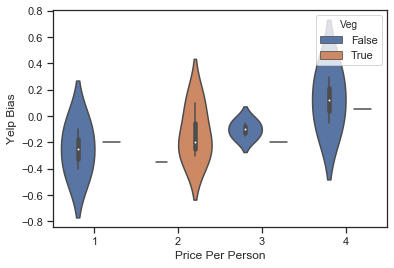

In [182]:
import seaborn as sns
sns.set(style="ticks")
sns.violinplot(x=final_df['Price Per Person'], y=final_df['Yelp Bias'], pallete='muted', hue=final_df['Veg'],scale='count')

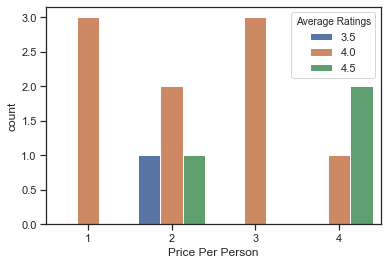

In [183]:
sns.countplot(x=final_df['Price Per Person'], hue=final_df['Average Ratings'])

Text(0, 0.5, 'Count')

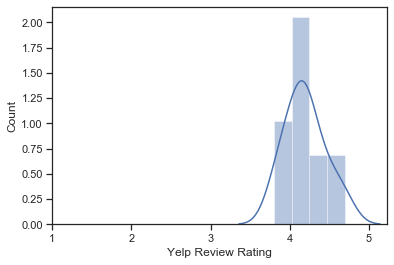

In [191]:
a=sns.distplot(final_df['Review_Average'])
a.set_xticks(range(1,6))
a.set_xlabel('Yelp Review Rating')
a.set_ylabel('Count')

Text(0, 0.5, 'Count')

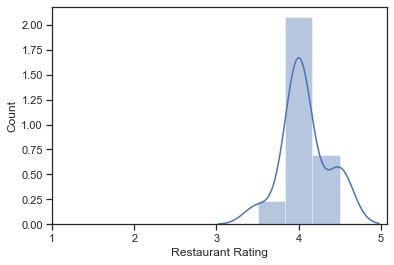

In [192]:
a=sns.distplot(final_df['Average Ratings'])
a.set_xticks(range(1,6))
a.set_xlabel('Restaurant Rating')
a.set_ylabel('Count')